# Explore here

In [1]:
# ==============================
# 📊 Librerías de Manipulación de Datos
# ==============================
import pandas as pd
import numpy as np

# ==============================
# 📊 Visualización de Datos
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# ⚡ Machine Learning y Modelado
# ==============================
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ==============================
# 📊 Evaluación del Modelo
# ==============================
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, roc_curve, auc
)

# ==============================
# 🔍 Interpretabilidad del Modelo (SHAP)
# ==============================
import shap

# ==============================
# ✅ Guardado del Modelo
# ==============================
import pickle
import os

In [43]:
df = pd.read_csv('../data/loan_dataset.csv')

In [44]:
# Vista inicial
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

Dimensiones del dataset: (70000, 28)

Primeras filas:


,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,252221,20000.0,36 months,25.49,800.39,E,E4,manager,10+ years,MORTGAGE,...,9.0,1.0,10999.0,37.9,14.0,w,INDIVIDUAL,1.0,1.0,"70047 Andrea Shoals\r\nLake Heatherland, CT 29597"
1,110451,16000.0,36 months,7.49,497.63,A,A4,manager,10+ years,MORTGAGE,...,18.0,0.0,43505.0,57.7,36.0,f,INDIVIDUAL,3.0,0.0,"896 Douglas Springs\r\nBrownburgh, IL 48052"
2,388741,25000.0,60 months,7.99,506.80,A,A5,"Director, National Accounts",10+ years,MORTGAGE,...,12.0,0.0,20430.0,38.0,23.0,w,INDIVIDUAL,2.0,0.0,5357 Allen Hills Suite 666\r\nNorth Calebhaven...
3,73935,2800.0,36 months,13.49,95.01,C,C2,NaN,NaN,MORTGAGE,...,11.0,0.0,25593.0,78.5,19.0,w,INDIVIDUAL,3.0,0.0,USNV Riley\r\nFPO AE 30723
4,200177,30000.0,60 months,25.49,889.18,E,E4,General Manager,4 years,MORTGAGE,...,8.0,0.0,10197.0,69.8,24.0,w,INDIVIDUAL,2.0,0.0,"5727 Manning Cliff\r\nSallychester, KY 30723"



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            70000 non-null  int64  
 1   loan_amnt             70000 non-null  float64
 2   term                  70000 non-null  object 
 3   int_rate              70000 non-null  float64
 4   installment           70000 non-null  float64
 5   grade                 70000 non-null  object 
 6   sub_grade             70000 non-null  object 
 7   emp_title             65897 non-null  object 
 8   emp_length            65884 non-null  object 
 9   home_ownership        70000 non-null  object 
 10  annual_inc            70000 non-null  float64
 11  verification_status   70000 non-null  object 
 12  issue_d               70000 non-null  object 
 13  loan_status           70000 non-null  object 
 14  purpose               70000 non-null  object

In [45]:
# Descartamos columna índice adicional
df = df.drop("Unnamed: 0",axis=1)

In [46]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,70000.000000,70000.000000,70000.000000,7.000000e+04,70000.000000,70000.000000,70000.000000,7.000000e+04,69957.000000,70000.000000,70000.000000,70000.000000
mean,14930.873571,13.454935,447.675277,7.973016e+04,18.798681,12.000114,0.241643,1.671999e+04,48.437556,26.491229,1.794943,0.154557
std,9027.197402,4.855157,269.312084,7.811552e+04,39.273822,5.675922,0.690384,2.495247e+04,25.081014,12.485598,2.014209,0.405304
min,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,9.760000,250.290000,4.900000e+04,11.910000,8.000000,0.000000,5.556000e+03,29.300000,17.000000,0.000000,0.000000
50%,13000.000000,12.880000,382.550000,6.800000e+04,18.020000,11.000000,0.000000,1.081900e+04,47.800000,25.000000,1.000000,0.000000
75%,20000.000000,16.590000,602.300000,9.500000e+04,24.830000,15.000000,0.000000,1.995500e+04,67.500000,34.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,7.600000e+06,9999.000000,57.000000,86.000000,1.023940e+06,152.500000,151.000000,32.000000,8.000000


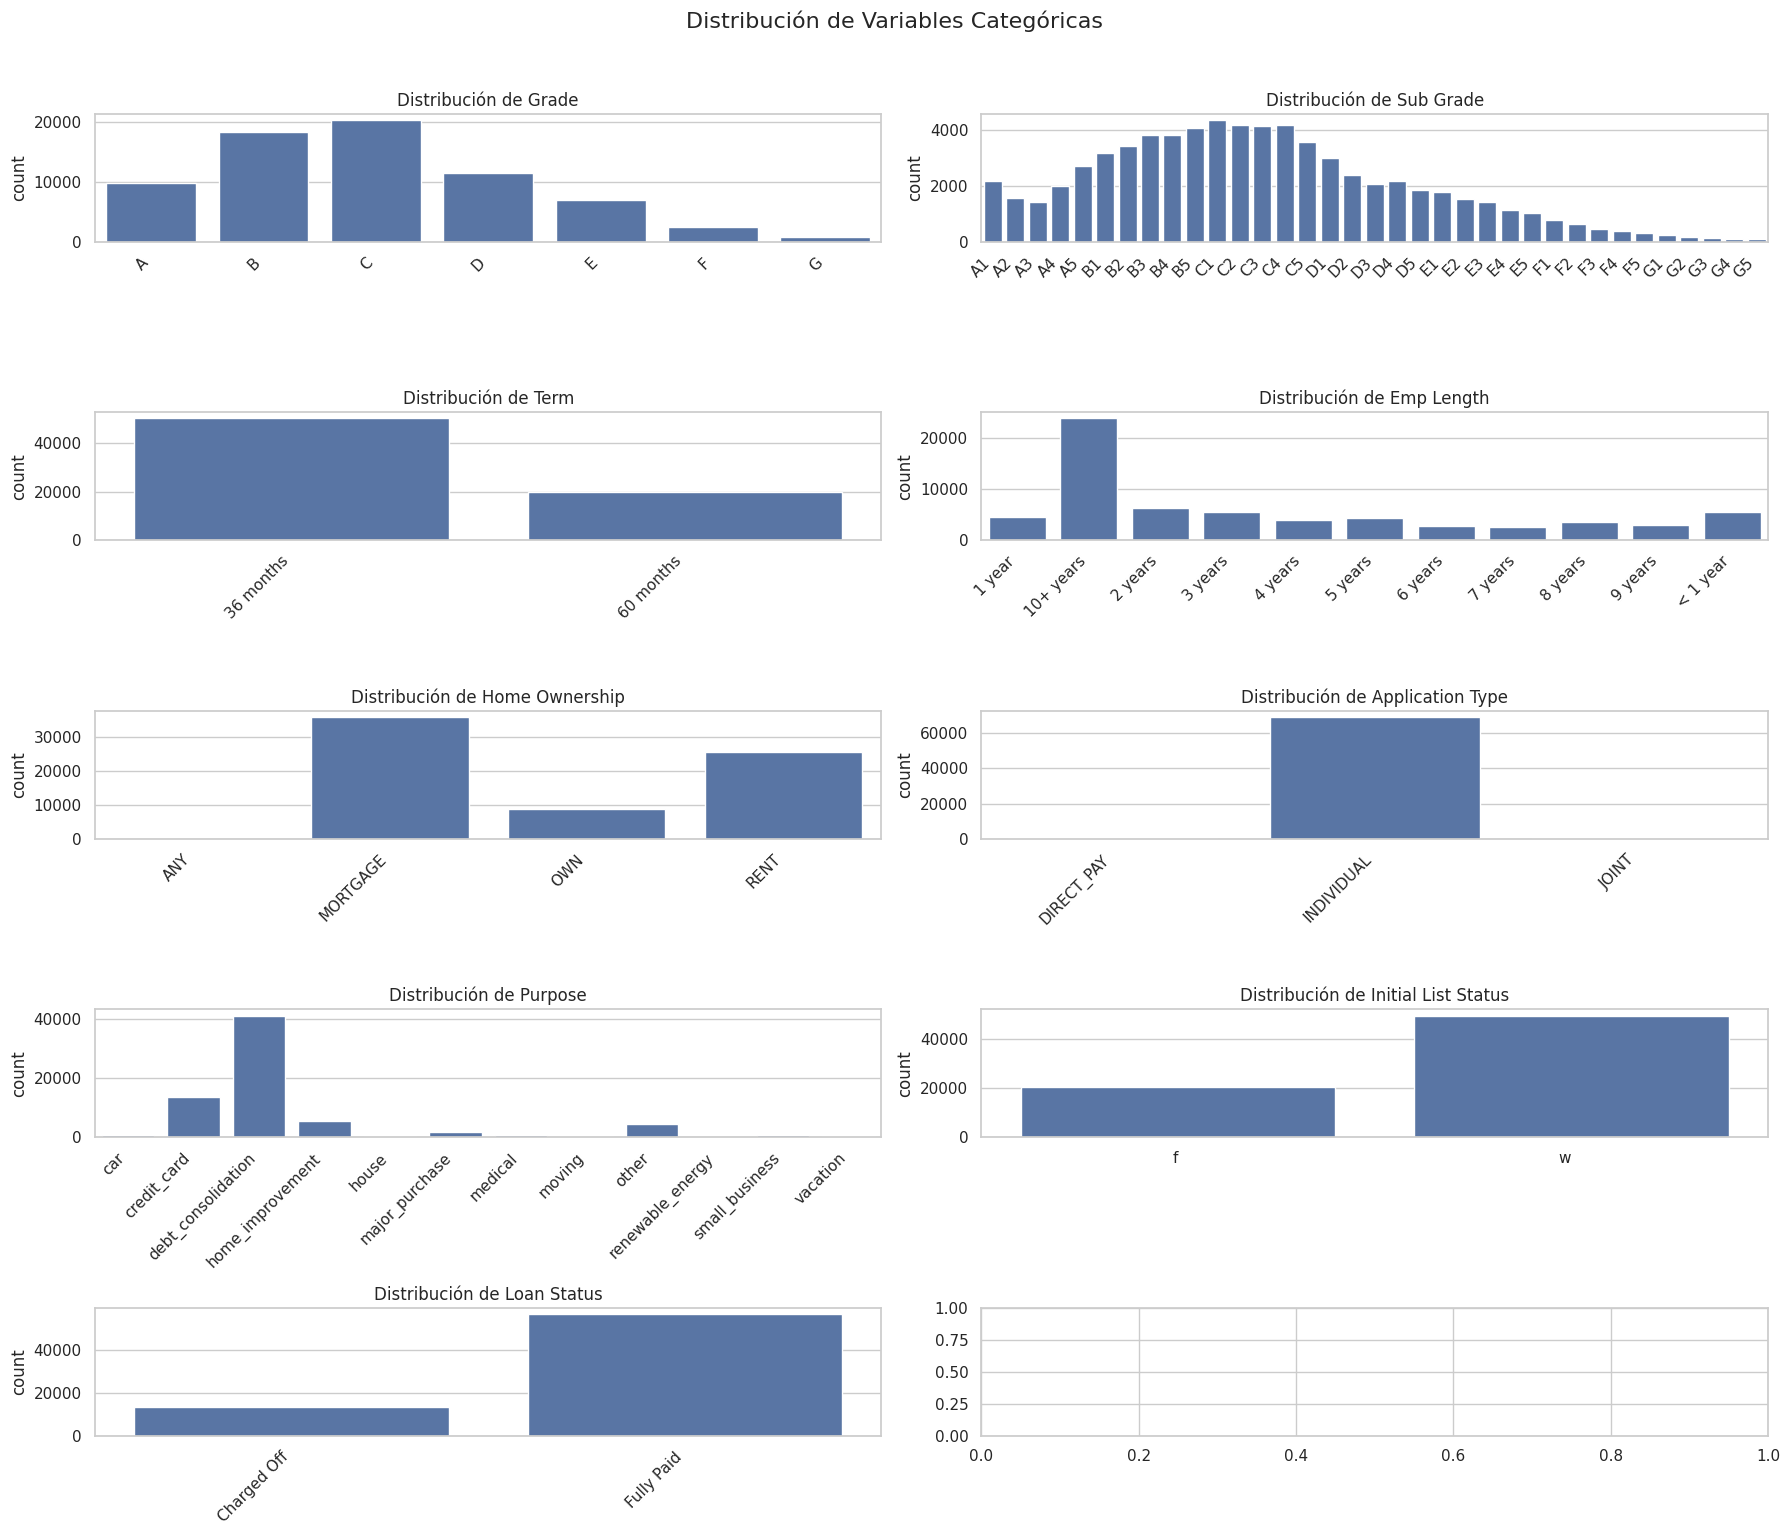

In [47]:
sns.set(style="whitegrid") 
plt.rcParams['font.size'] = 10 

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
fig.suptitle('Distribución de Variables Categóricas', y=1.02, fontsize=16)

variables_cat = [
    "grade", "sub_grade", "term", "emp_length",
    "home_ownership", "application_type", "purpose",
    "initial_list_status", "loan_status"
]

for ax, var in zip(axes.flatten(), variables_cat):
    order = sorted(df[var].dropna().unique())
    sns.countplot(ax=ax, data=df, x=var, order=order)
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}')
    ax.set_xlabel('')
    
    if df[var].nunique() > 5 or any(len(str(x)) > 4 for x in df[var].unique()):
        ax.tick_params(axis='x', rotation=45)
    
    plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
plt.show()

In [48]:
# conversion de variables categóricas por mascara

dict_emp_length = {"< 1 year":0, "1 year ":1, 
                   "2 years":2, "3 years":3, 
                   "4 years":4, "5 years":5, 
                   "6 years":6, "7 years":7, 
                   "8 years":8, "9 years":9, 
                   "10+ years":10}

df["loan_status"] = df["loan_status"].map({"Fully Paid":0, "Charged Off":1})
df["initial_list_status"] = df["initial_list_status"].map({"w":0, "f":1})
df["emp_length"] = df["emp_length"].map(dict_emp_length)

In [49]:
# conversion de term con split y numeric
df['term'] = df['term'].str.split().str[0]
df['term'] = pd.to_numeric(df['term'])

In [50]:
# extraccion del zip code de la columna address
df['zip_code'] = df['address'].str.extract(r'\s(\d{5})(?:-\d{4})?$')
df['zip_code'] = pd.to_numeric(df['zip_code'])
df['zip_code'].head()

0    29597
1    48052
2    22690
3    30723
4    30723
Name: zip_code, dtype: int64

In [51]:
# conversion de issue_d a datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

# separar columnas en month y year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [52]:
# Crear issue_d_scaled: año + fracción del mes
df['issue_d_scaled'] = df['issue_year'] + (df['issue_month'] - 1) / 12

# Verificar resultado
print("\n✅ Ejemplos de issue_d_scaled:")
print(df[['issue_year', 'issue_month', 'issue_d_scaled']].head())


✅ Ejemplos de issue_d_scaled:
   issue_year  issue_month  issue_d_scaled
0        2016           12     2016.916667
1        2016           12     2016.916667
2        2016           12     2016.916667
3        2016           12     2016.916667
4        2016           12     2016.916667


In [53]:
# dropeo de columnas innecesarias

df = df.drop("grade", axis=1)
df = df.drop("title", axis=1)
df = df.drop("earliest_cr_line", axis=1)
df = df.drop("application_type", axis=1)
df = df.drop("address", axis=1)
df = df.drop("issue_d", axis=1)
df = df.drop("issue_month", axis=1)
df = df.drop("issue_year", axis=1)
df = df.drop("emp_title", axis=1)

In [54]:
# conversion de variables categóricas a numéricas por label encoding

# Inicializar el LabelEncoder
le = LabelEncoder()

# Aplicar el encoder a la columna
df['sub_grade'] = le.fit_transform(df['sub_grade'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             70000 non-null  float64
 1   term                  70000 non-null  int64  
 2   int_rate              70000 non-null  float64
 3   installment           70000 non-null  float64
 4   sub_grade             70000 non-null  int64  
 5   emp_length            61247 non-null  float64
 6   home_ownership        70000 non-null  object 
 7   annual_inc            70000 non-null  float64
 8   verification_status   70000 non-null  object 
 9   loan_status           70000 non-null  int64  
 10  purpose               70000 non-null  object 
 11  dti                   70000 non-null  float64
 12  open_acc              70000 non-null  float64
 13  pub_rec               70000 non-null  float64
 14  revol_bal             70000 non-null  float64
 15  revol_util         

In [57]:
# Aplicación del OneHotEncoding a las variables categóricas restantes

# Columnas categóricas
columnas_categoricas = ["home_ownership", "verification_status", "purpose"]

# Inicializar el encoder
encoder = OneHotEncoder(
    sparse_output=False # Devuelve un array denso (no sparse)
)

# Aplicar OneHotEncoding
encoded_data = encoder.fit_transform(df[columnas_categoricas])

# Convertir a DataFrame y asignar nombres de columnas
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

# Concatenar con el DataFrame original (eliminando las columnas originales)
df_final = pd.concat([
    df.drop(columnas_categoricas, axis=1),
    encoded_df
], axis=1)

# Mostrar resultado
print(df_final.head())


   loan_amnt  term  int_rate  installment  sub_grade  emp_length  annual_inc  \
0    20000.0    36     25.49       800.39         23        10.0     60000.0   
1    16000.0    36      7.49       497.63          3        10.0     80000.0   
2    25000.0    60      7.99       506.80          4        10.0    300000.0   
3     2800.0    36     13.49        95.01         11         NaN    102000.0   
4    30000.0    60     25.49       889.18         23         4.0     82000.0   

   loan_status    dti  open_acc  ...  purpose_debt_consolidation  \
0            0  18.42       9.0  ...                         1.0   
1            0  14.34      18.0  ...                         0.0   
2            0  12.88      12.0  ...                         0.0   
3            0  11.77      11.0  ...                         0.0   
4            0  11.05       8.0  ...                         0.0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                       0.0            0

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            70000 non-null  float64
 1   term                                 70000 non-null  int64  
 2   int_rate                             70000 non-null  float64
 3   installment                          70000 non-null  float64
 4   sub_grade                            70000 non-null  int64  
 5   emp_length                           61247 non-null  float64
 6   annual_inc                           70000 non-null  float64
 7   loan_status                          70000 non-null  int64  
 8   dti                                  70000 non-null  float64
 9   open_acc                             70000 non-null  float64
 10  pub_rec                              70000 non-null  float64
 11  revol_bal                   

In [59]:
# Seleccionar columnas numéricas
numericas_float = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'mort_acc', 'pub_rec_bankruptcies'
]

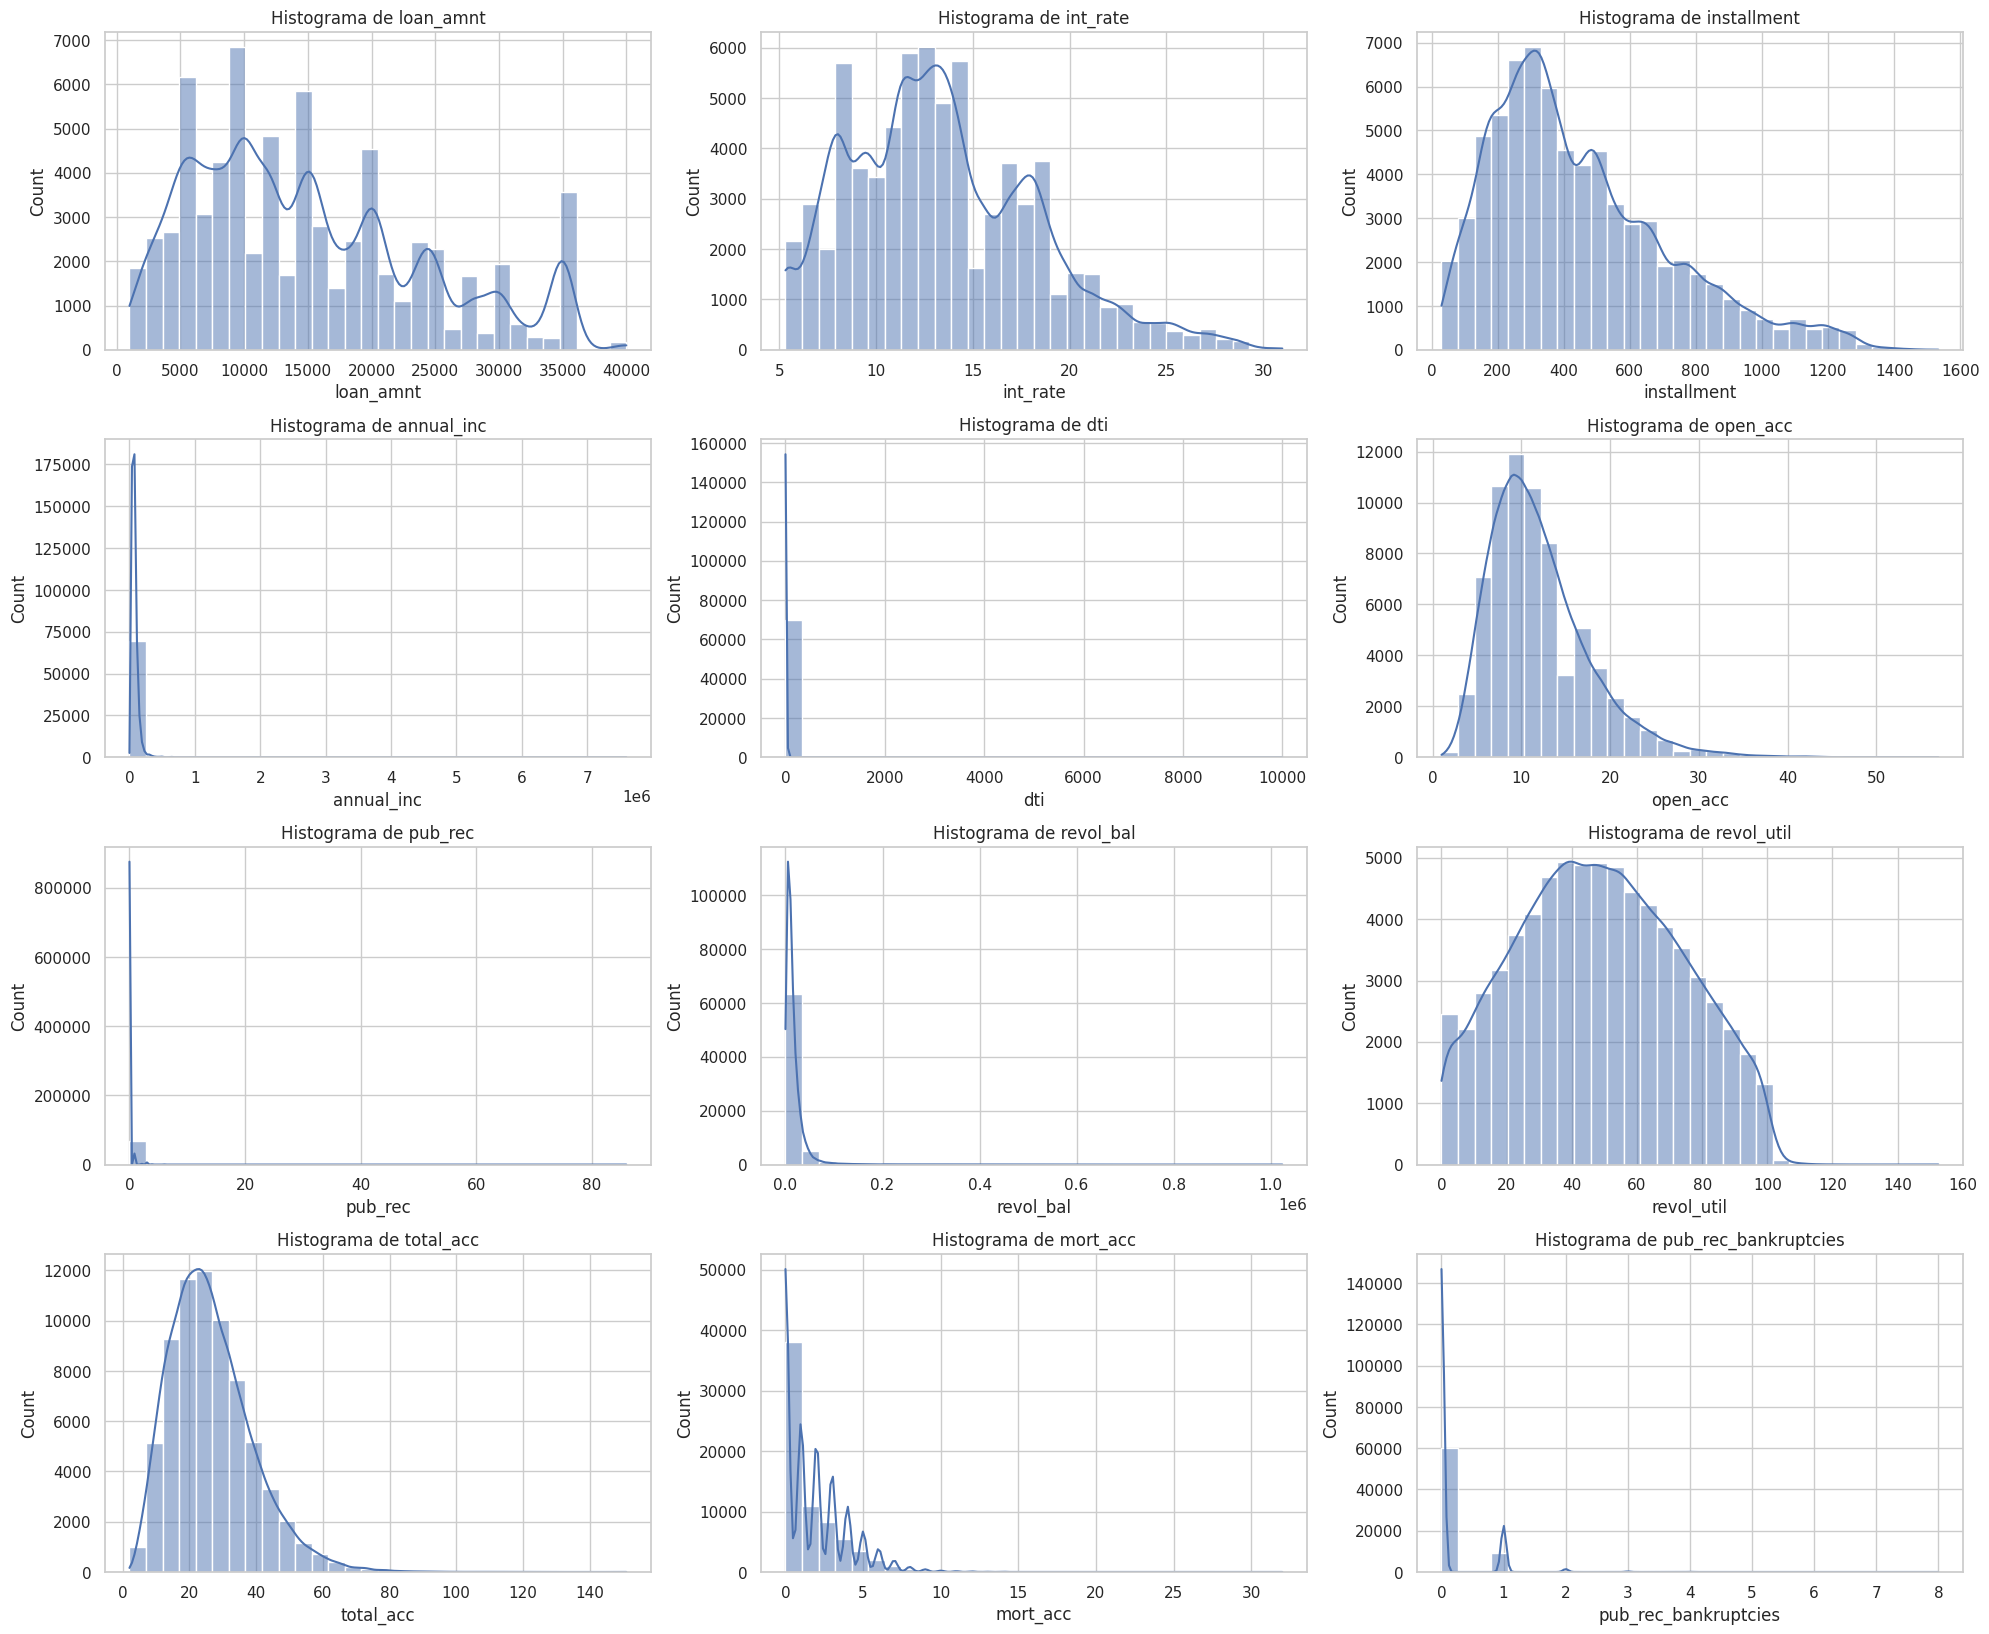

In [60]:
# Histograma de variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

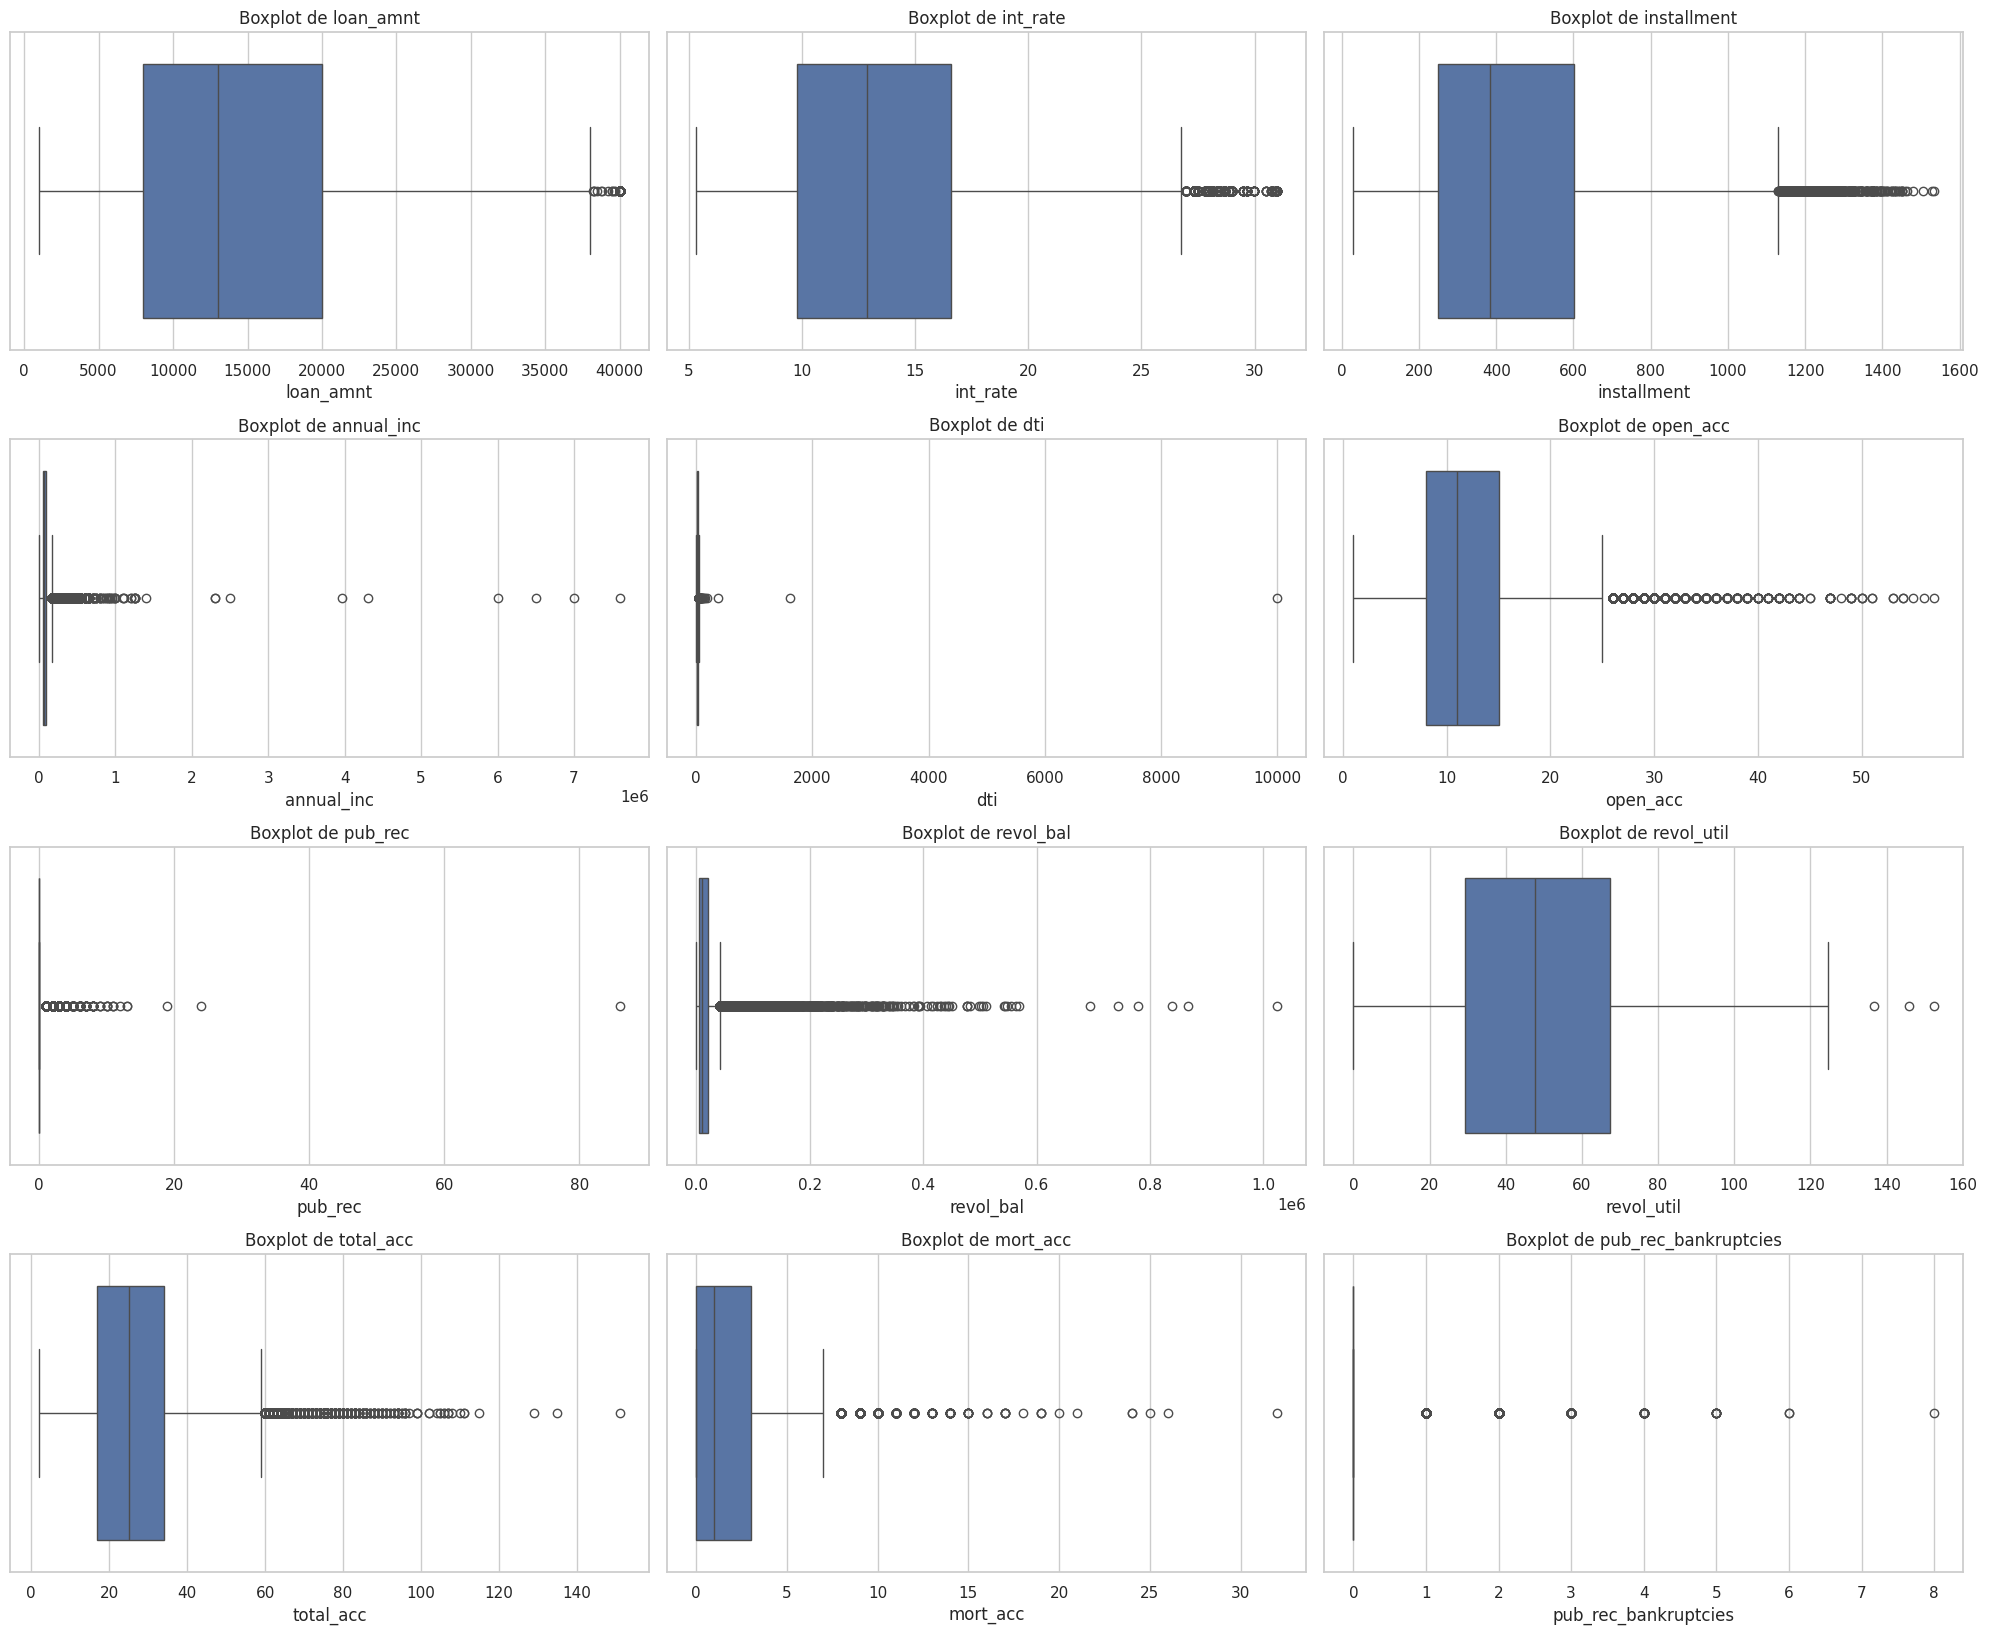

In [61]:
# Boxplots para las variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

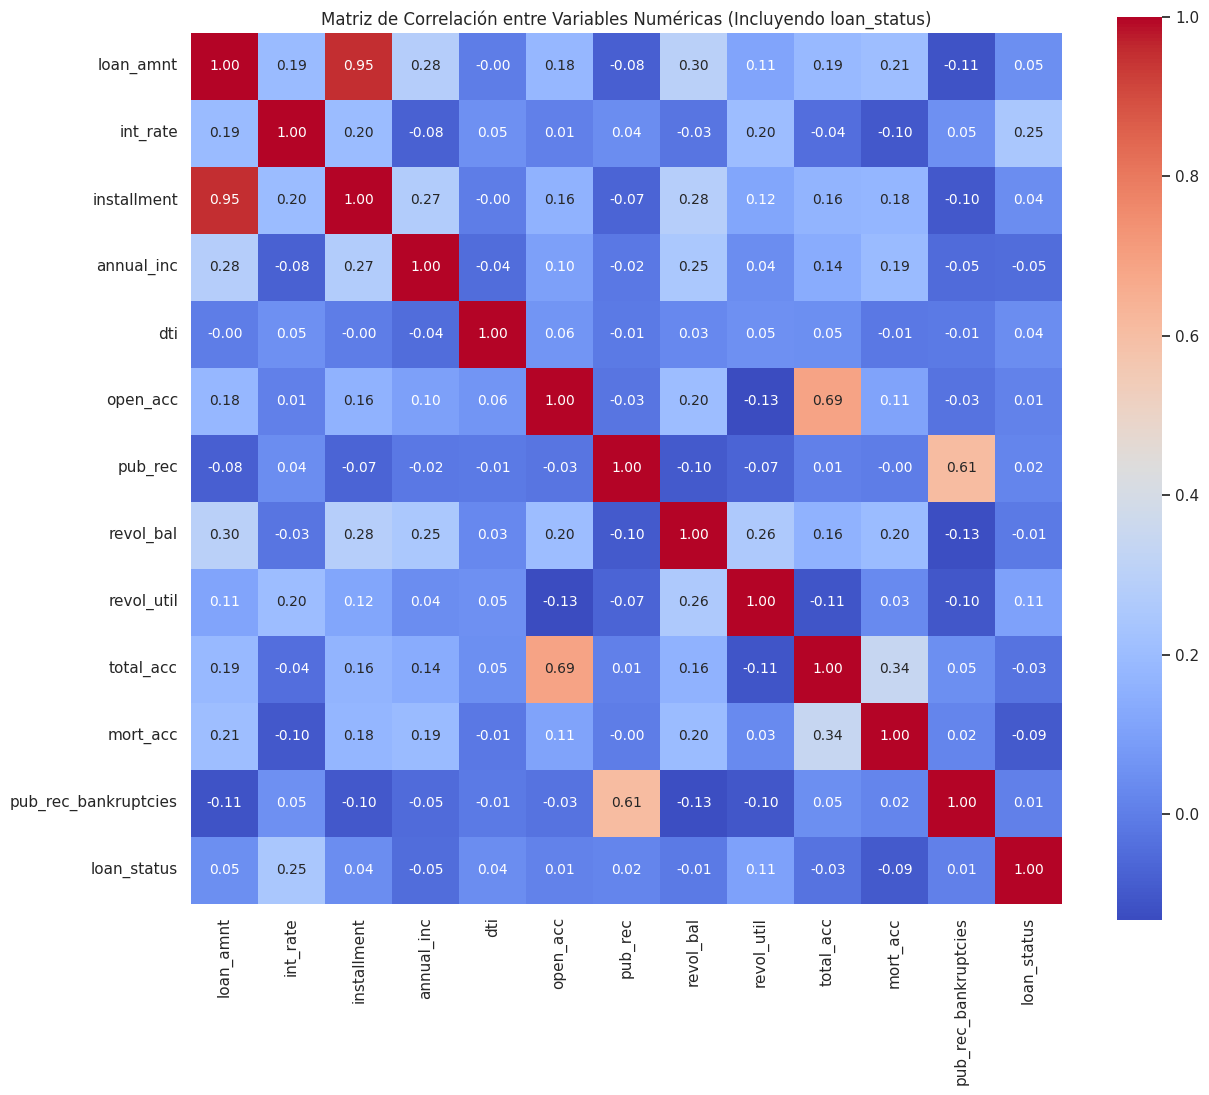

In [62]:
# Relación entre variables numéricas (float64 + loan_status)
# Agregar la variable objetivo a la lista
numericas_float_con_objetivo = numericas_float + ['loan_status']

# Calcular la matriz de correlación incluyendo la variable objetivo
corr_matrix = df_final[numericas_float_con_objetivo].corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Variables Numéricas (Incluyendo loan_status)')
plt.tight_layout()
plt.show()

In [63]:
# Lista de variables categóricas originales

cat_vars = [
    "sub_grade", "term", "emp_length", "home_ownership", 
    "verification_status", "purpose", "initial_list_status"
]

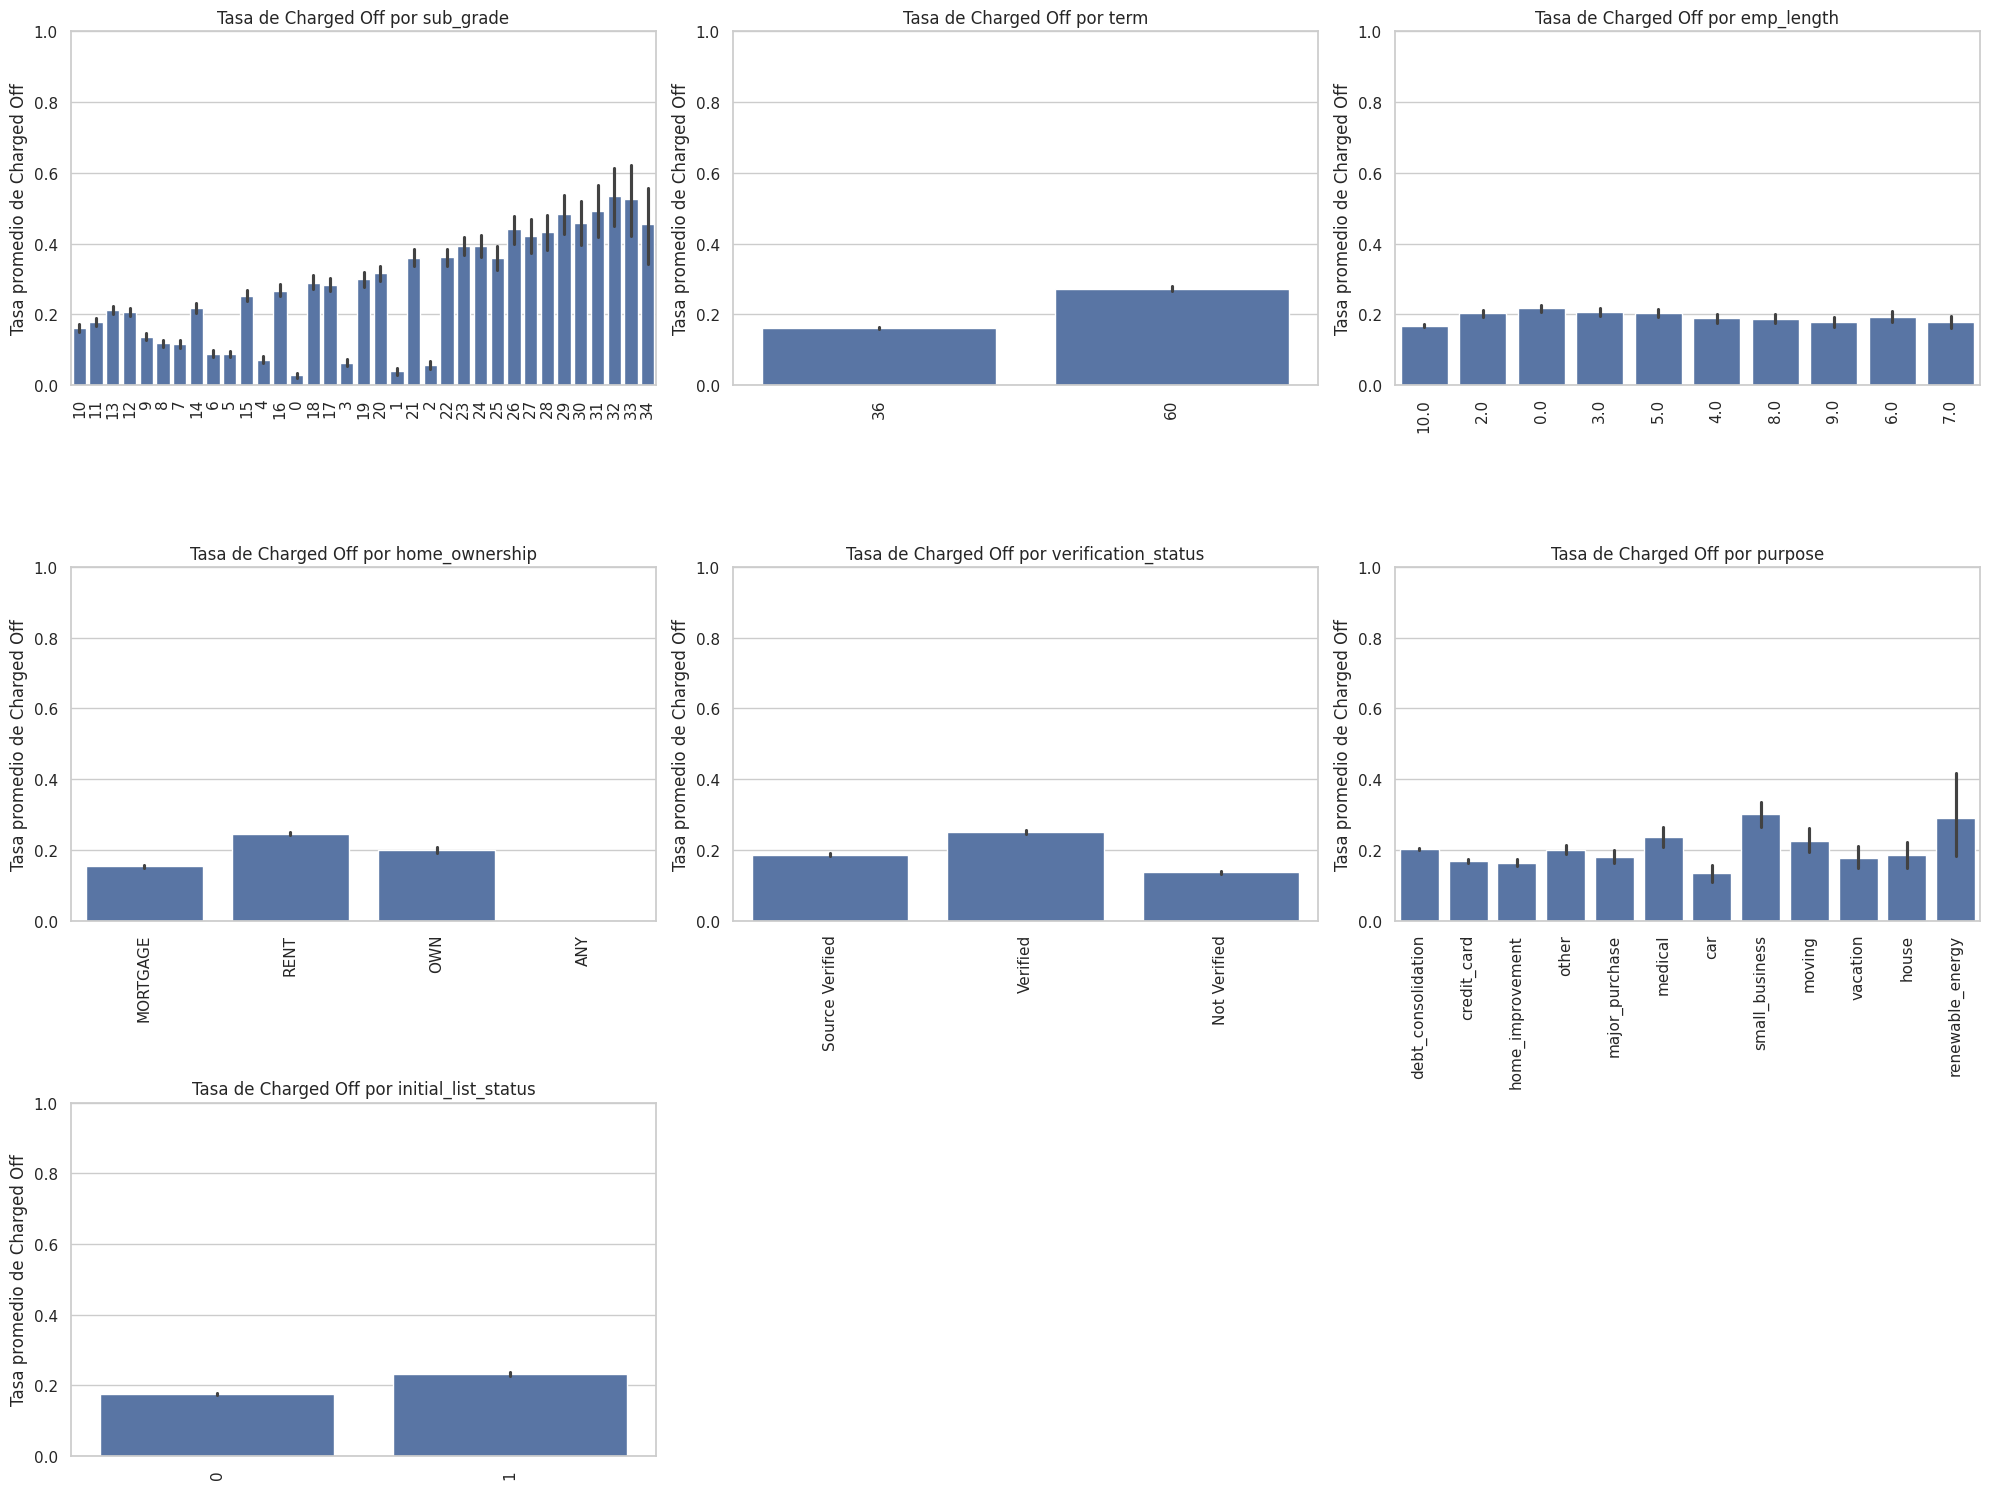

In [64]:
# Relación entre variables categóricas y la variable objetivo.
# Usamos el DataFrame original antes del one-hot establecido como `df`

# Graficar proporción de Charged Off por categoría
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_vars):
    plt.subplot(3, 3, i + 1)
    orden = df[col].value_counts().index
    sns.barplot(data=df, x=col, y="loan_status", order=orden)
    plt.xticks(rotation=90)
    plt.title(f'Tasa de Charged Off por {col}')
    plt.ylabel('Tasa promedio de Charged Off')
    plt.xlabel('')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

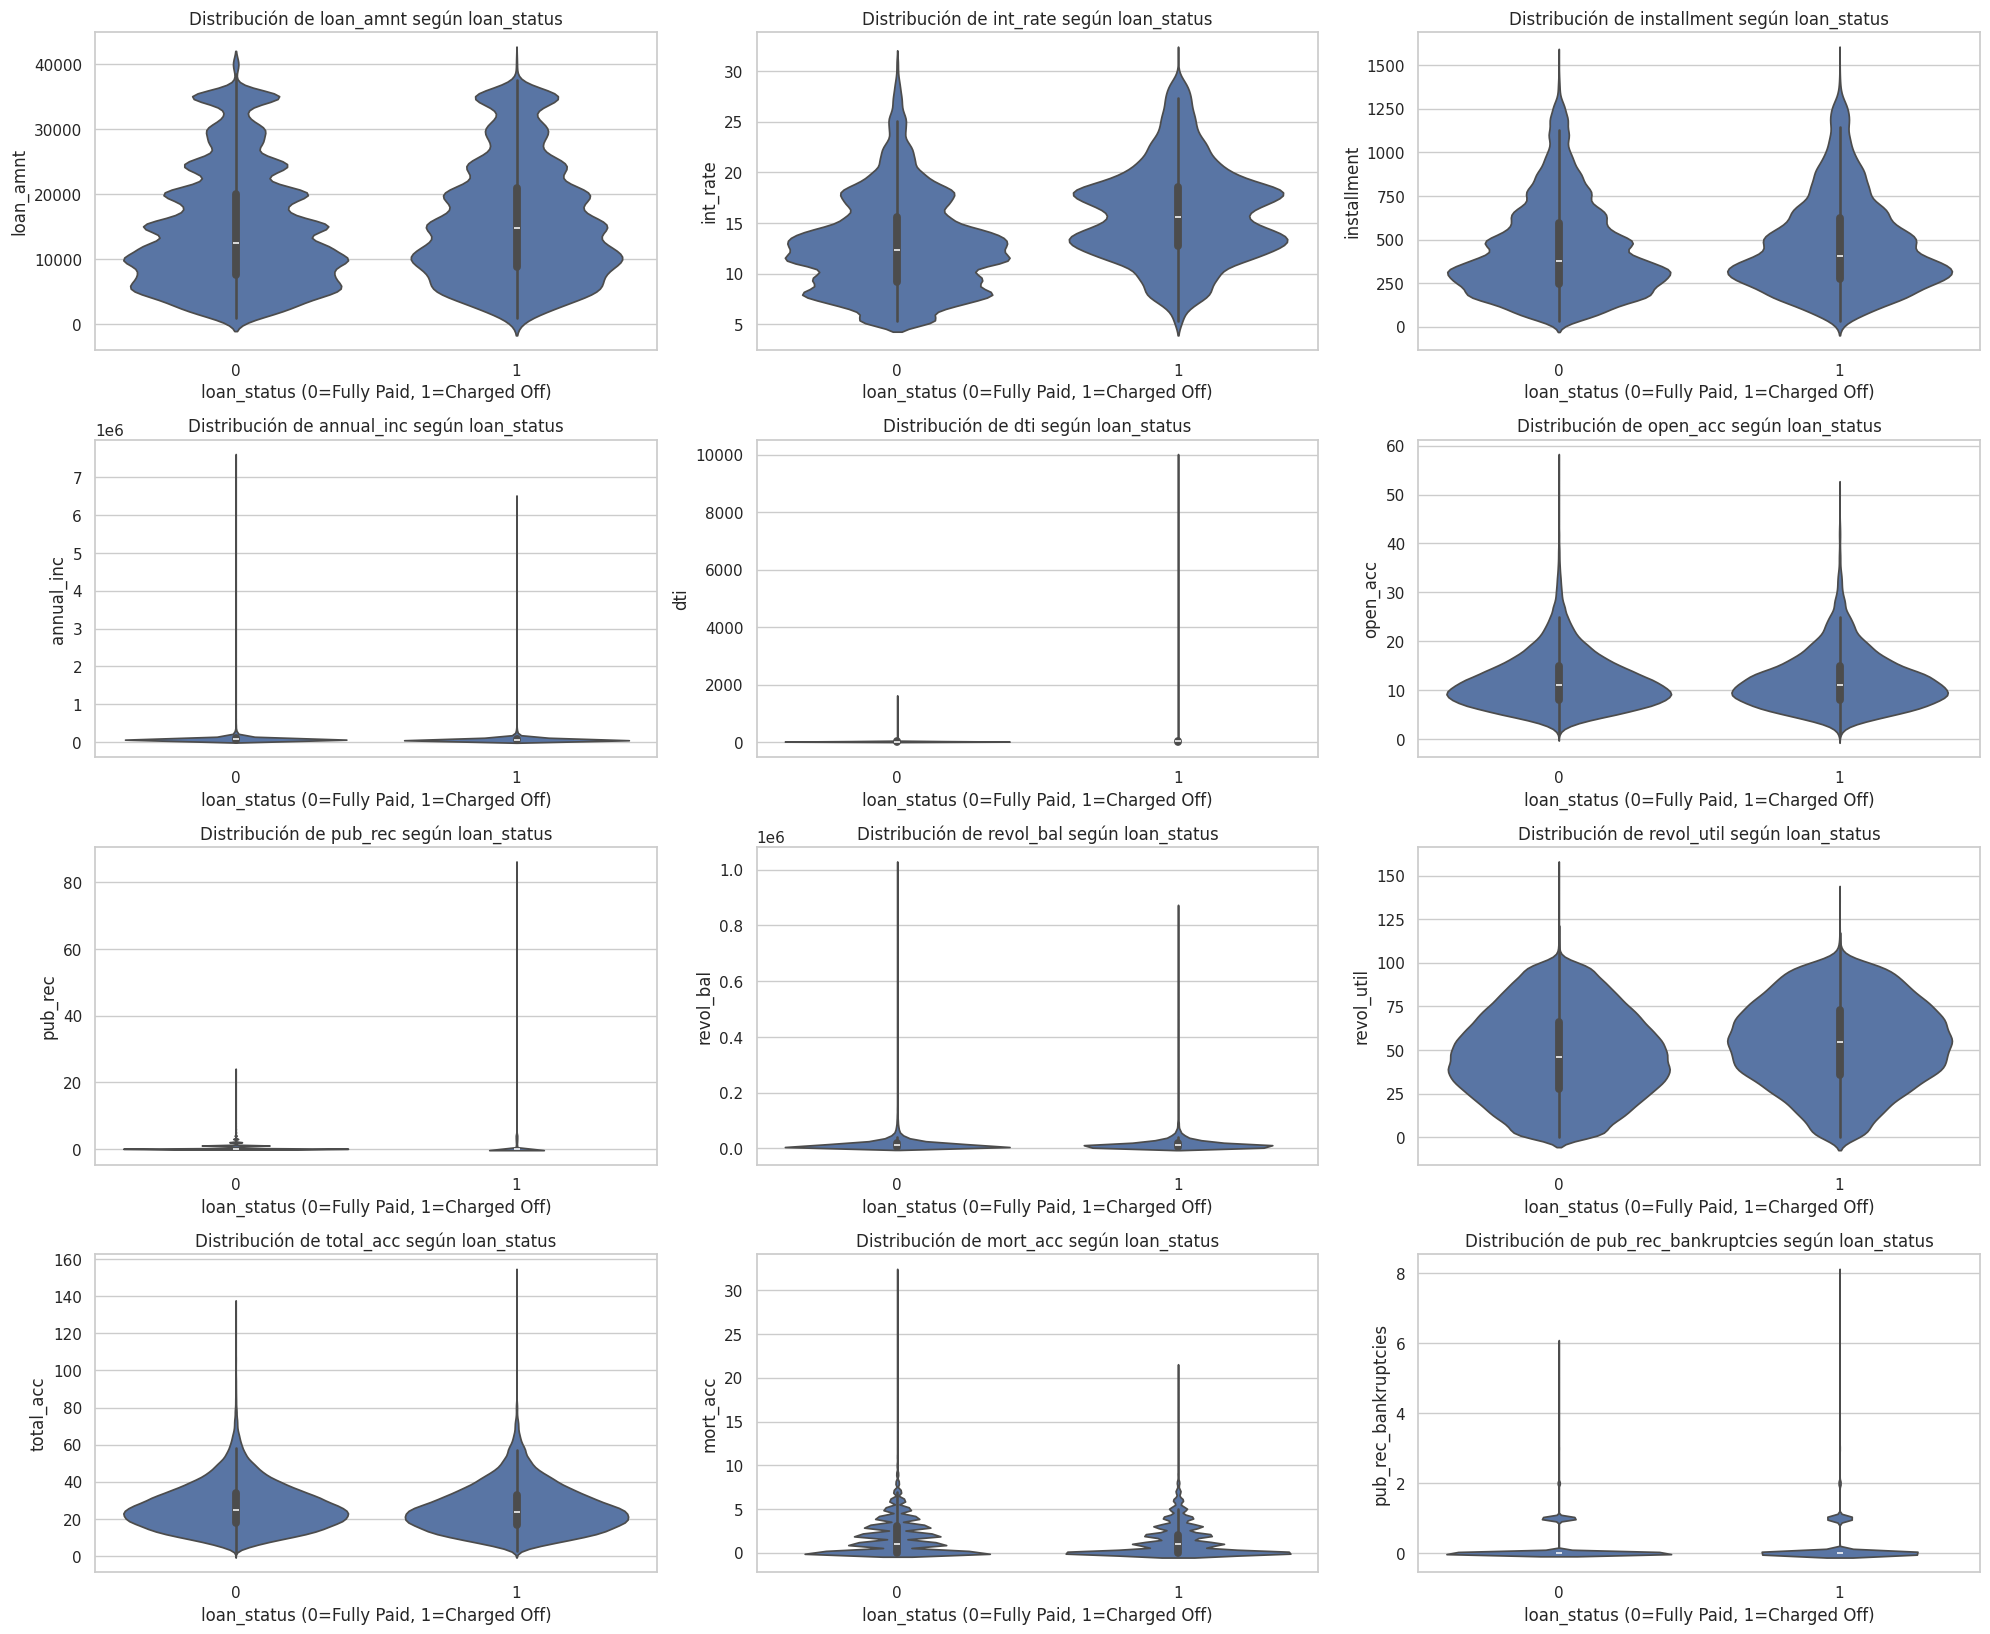

In [65]:
# Distribución de variables numéricas según loan_status
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df_final, x='loan_status', y=col, inner='box')
    plt.title(f'Distribución de {col} según loan_status')
    plt.xlabel('loan_status (0=Fully Paid, 1=Charged Off)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [66]:
# Definir variables X e y
X = df_final.drop(columns=['loan_status'])
y = df_final['loan_status']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# Instanciar el modelo de XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic', # Clasificación binaria
    eval_metric='auc',       # Métrica de evaluación
    random_state=42,             # Reproducibilidad
)

In [68]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Threshold óptimo: 0.35000000000000003


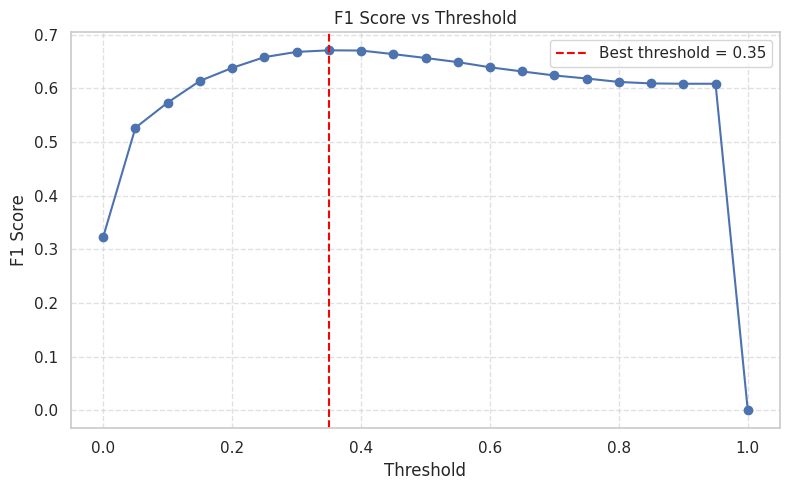

In [69]:
# Obtener las probabilidades del modelo (probabilidad de la clase positiva)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Definir lista de thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Probar cada threshold y calcular F1-Score
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Seleccionar el threshold óptimo
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold óptimo: {optimal_threshold}")

# Graficar F1-Score vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f"Best threshold = {optimal_threshold:.2f}")
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
# Predecir con el threshold óptimo
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Calcular métricas
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

Precision: 0.6944
Recall: 0.6494
F1-Score: 0.6711
AUC: 0.9196


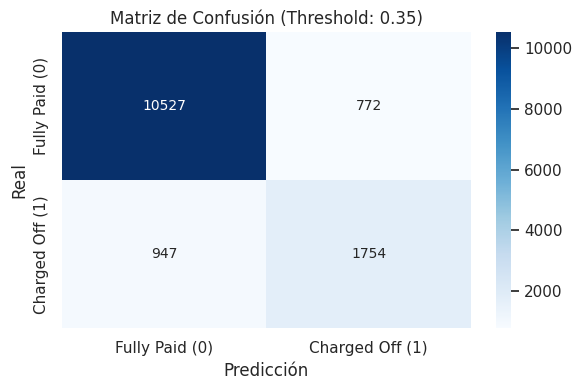

In [71]:
# Calcular la matriz de confusión con el threshold óptimo
y_pred_opt = (y_prob >= optimal_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_opt)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid (0)', 'Charged Off (1)'],
            yticklabels=['Fully Paid (0)', 'Charged Off (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión (Threshold: {optimal_threshold:.2f})')
plt.tight_layout()
plt.show()

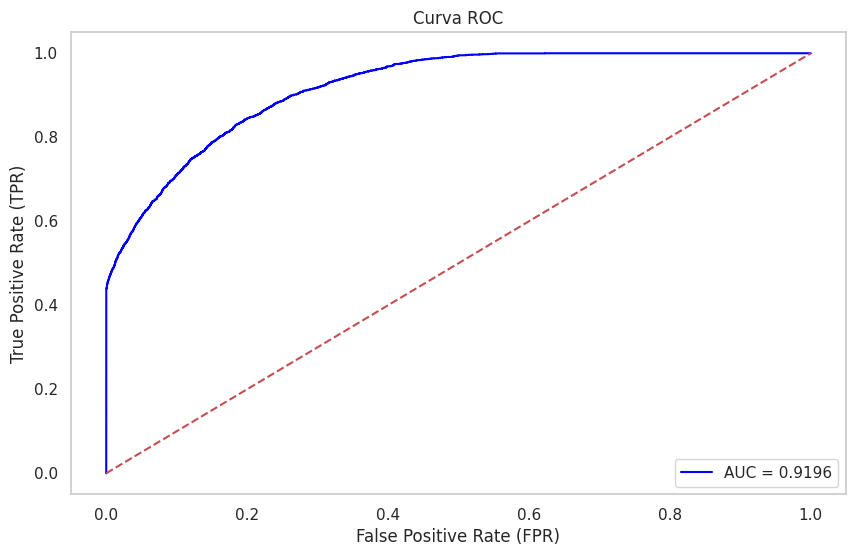

In [72]:
# Calcular FPR, TPR y thresholds para la curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

100%|===================| 13984/14000 [00:38<00:00]        

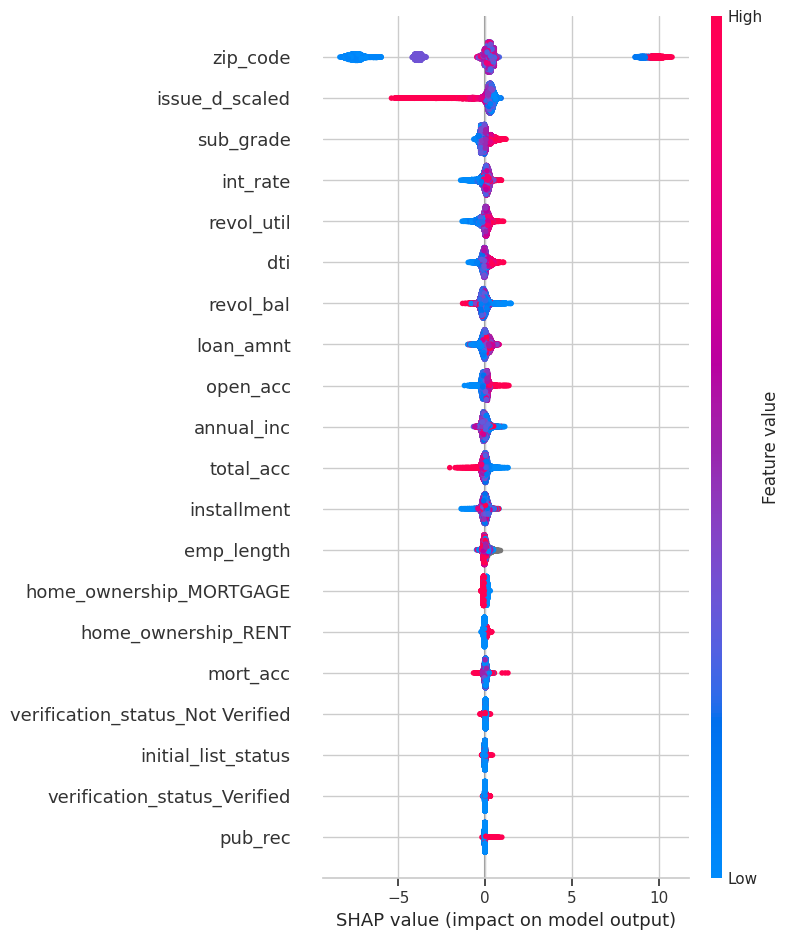

In [73]:
# Crear el Explainer de SHAP para XGBoost
explainer = shap.Explainer(xgb_model, X_train)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Resumen global de valores SHAP
shap.summary_plot(shap_values, X_test)

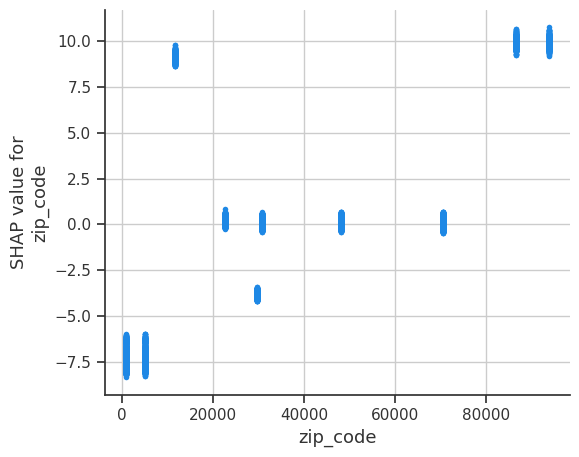

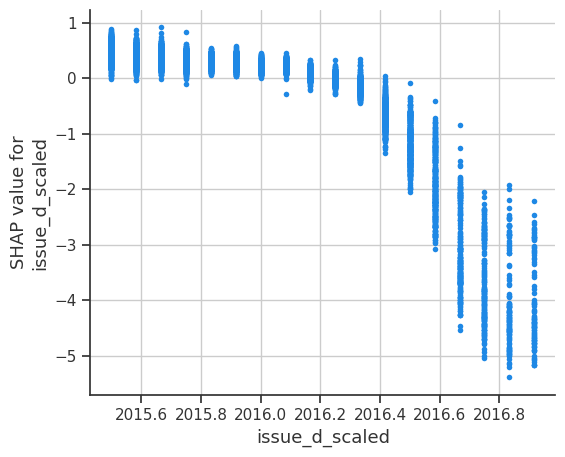

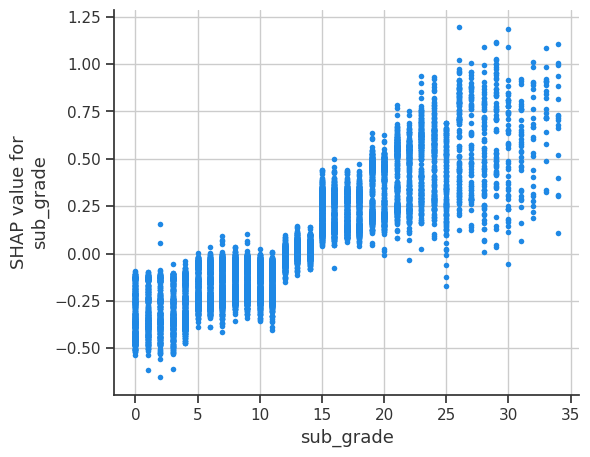

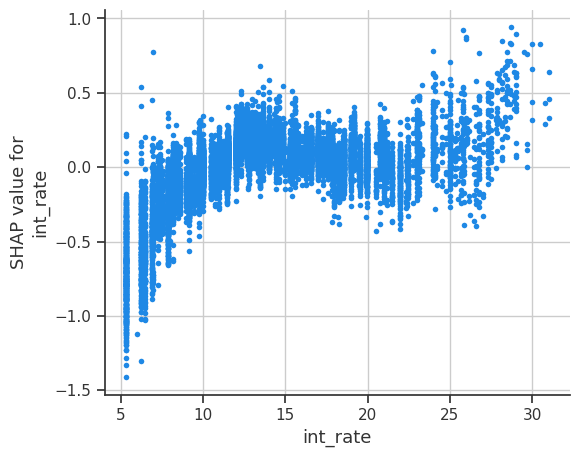

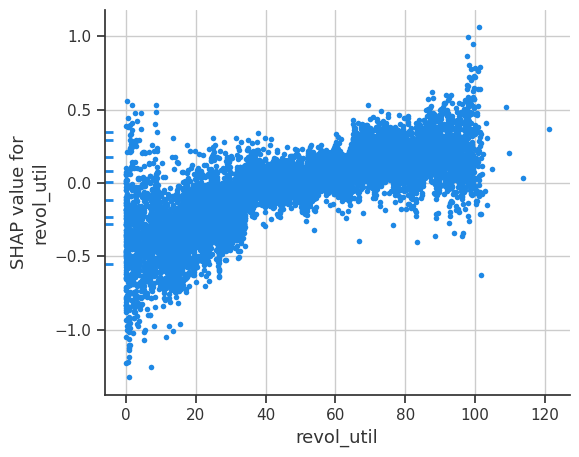

In [74]:
# Verificar que X_test está en formato DataFrame float
X_test_float = X_test.astype(float)

# Convertir valores SHAP al formato esperado (array)
shap_values_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Lista de variables clave para análisis
variables_clave = ["zip_code", "issue_d_scaled", "sub_grade", "int_rate", "revol_util"]

# Crear los dependence plots correctamente
for variable in variables_clave:
    shap.dependence_plot(variable, shap_values_array, X_test_float, interaction_index=None)

<Figure size 1000x800 with 0 Axes>

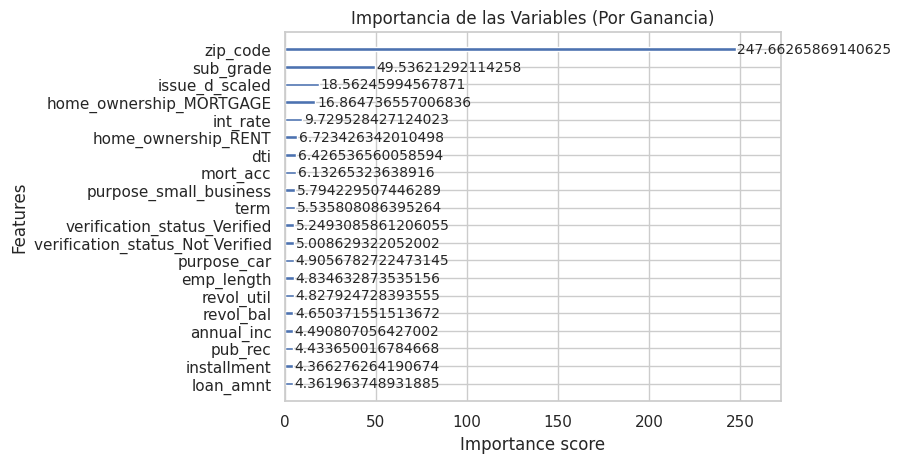

In [75]:
# Visualización de las variables más importantes del modelo (por Ganancia)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=20)
plt.title("Importancia de las Variables (Por Ganancia)")
plt.show()

In [76]:
# Crear el modelo base de XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',  # Maximizar AUC
    random_state=42
)

# Calcular el ratio de balance entre clases
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

In [77]:
# Definir el espacio de hiperparámetros optimizado
param_dist = {
    'max_depth': [3, 5, 7],             # Mantener solo los más efectivos
    'learning_rate': [0.01, 0.05, 0.1], # Tasa de aprendizaje efectiva
    'n_estimators': [100, 300, 500],    # Número de árboles optimizado
    'subsample': [0.7, 0.8, 1.0],       # Mantener solo las mejores opciones
    'colsample_bytree': [0.7, 0.8, 1.0],# Mantener solo las mejores opciones
    'scale_pos_weight': [ratio, ratio * 1.5]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=50,           # Probar solo 50 combinaciones aleatorias
    cv=5,                 # Validación cruzada de 5
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenar el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y AUC
print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Mejor AUC: {random_search.best_score_:.4f}")

# Usar el mejor modelo encontrado
best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=4.182785747339195, subsample=0.7; total time=   3.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=4.182785747339195, subsample=0.7; total time=   3.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=4.182785747339195, subsample=0.7; total time=   4.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=4.182785747339195, subsample=0.7; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=6.274178621008792, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, scale_pos_weight=4.182785747339195, subsample=0.7; total time=   4.5s
[CV] END colsample_bytree=

Threshold óptimo: 0.75


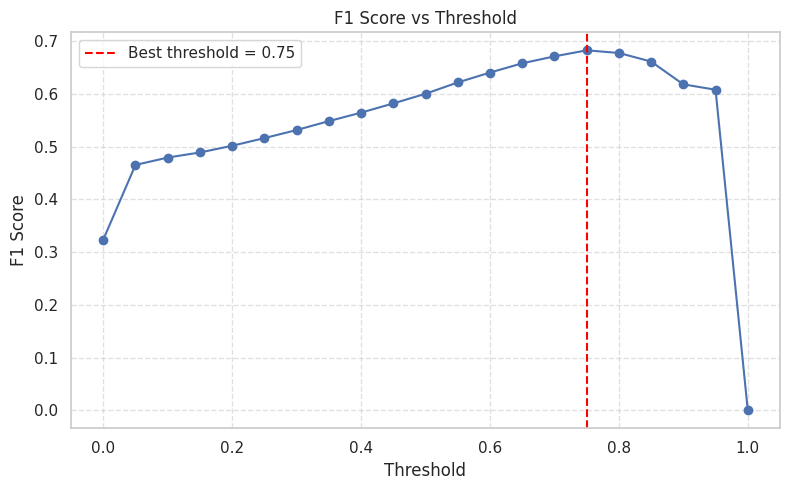

In [78]:
# Obtener las probabilidades del modelo (probabilidad de la clase positiva)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Definir lista de thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Probar cada threshold y calcular F1-Score
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Seleccionar el threshold óptimo
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold óptimo: {optimal_threshold}")

# Graficar F1-Score vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f"Best threshold = {optimal_threshold:.2f}")
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [79]:
# Predecir con el threshold óptimo
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Calcular métricas
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

Precision: 0.6916
Recall: 0.6742
F1-Score: 0.6828
AUC: 0.9244


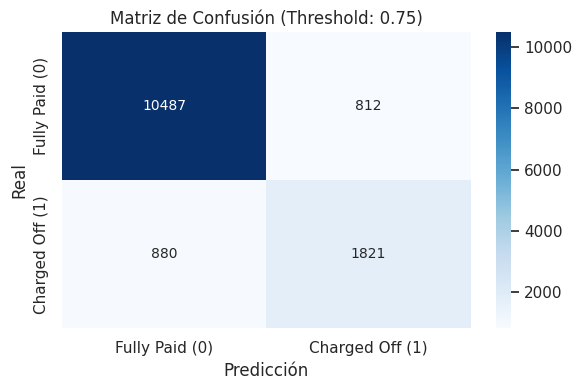

In [80]:
# Calcular la matriz de confusión con el threshold óptimo
y_pred_opt = (y_prob >= optimal_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_opt)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid (0)', 'Charged Off (1)'],
            yticklabels=['Fully Paid (0)', 'Charged Off (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión (Threshold: {optimal_threshold:.2f})')
plt.tight_layout()
plt.show()

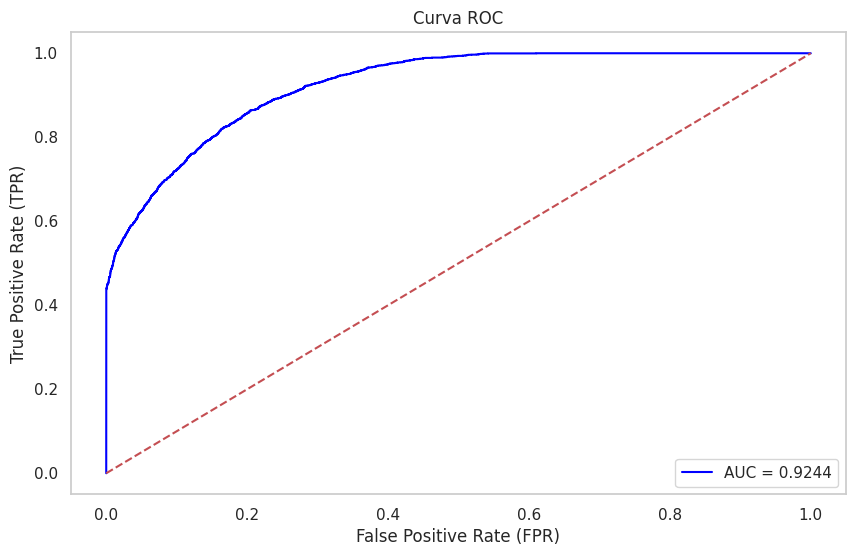

In [81]:
# Calcular FPR, TPR y thresholds para la curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

 99%|===================| 13863/14000 [01:18<00:00]        

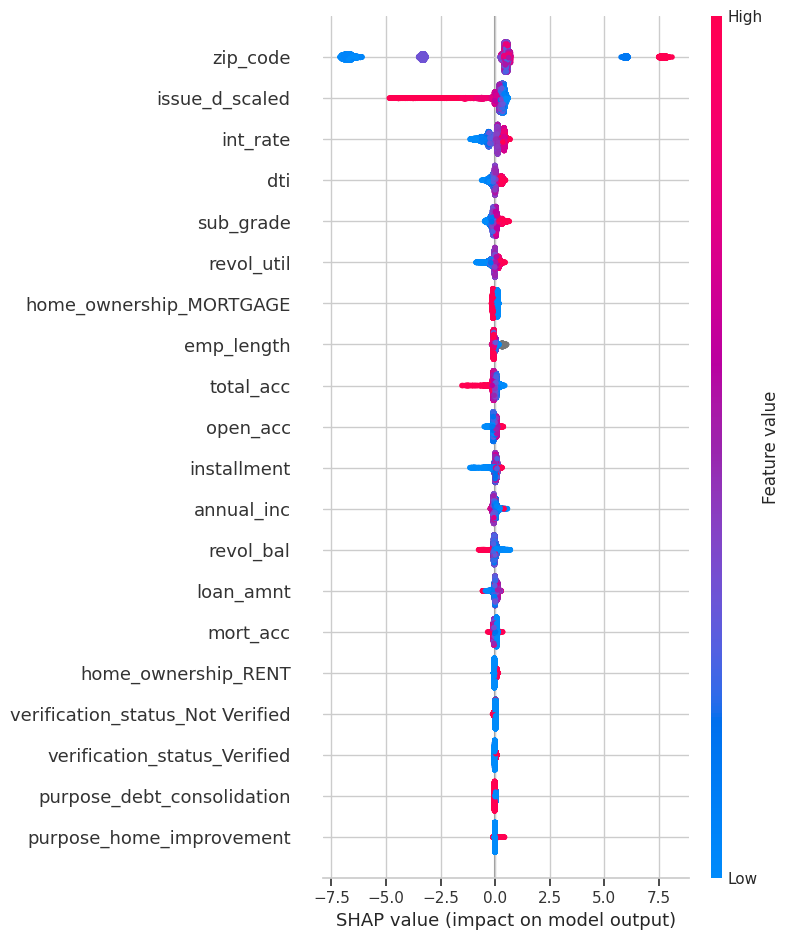

In [82]:
# Crear el Explainer de SHAP para XGBoost
explainer = shap.Explainer(best_xgb, X_train)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Resumen global de valores SHAP
shap.summary_plot(shap_values, X_test)

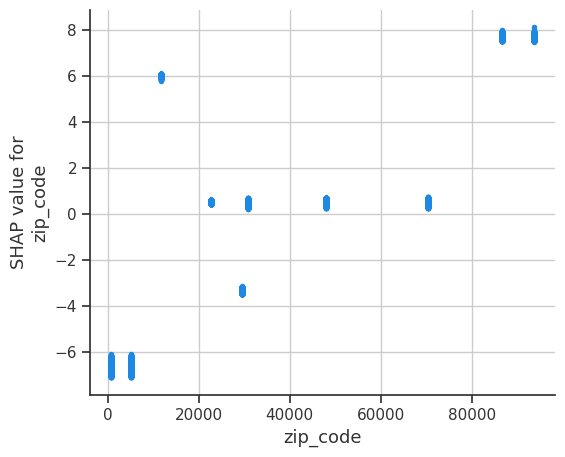

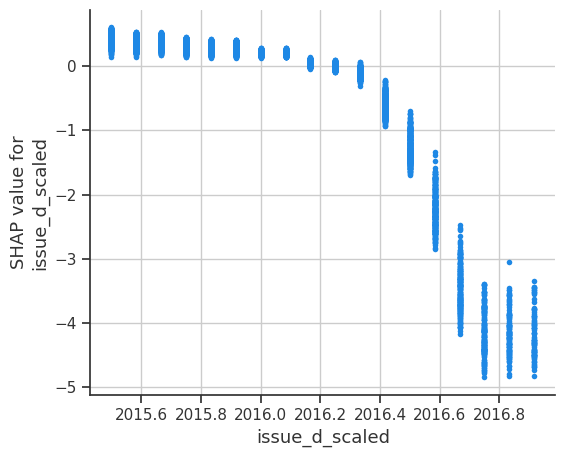

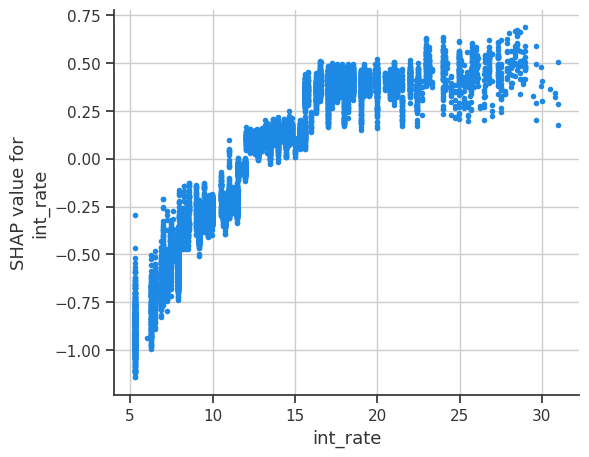

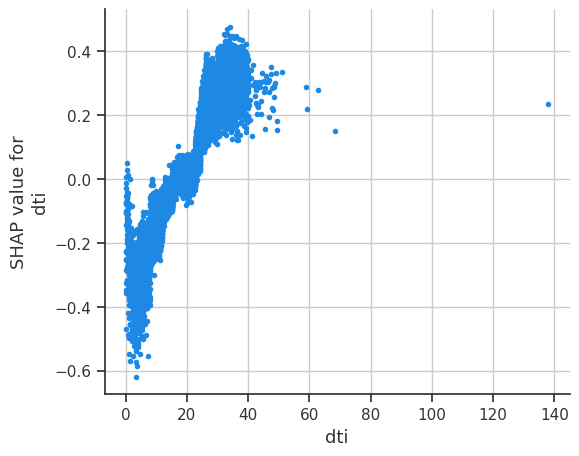

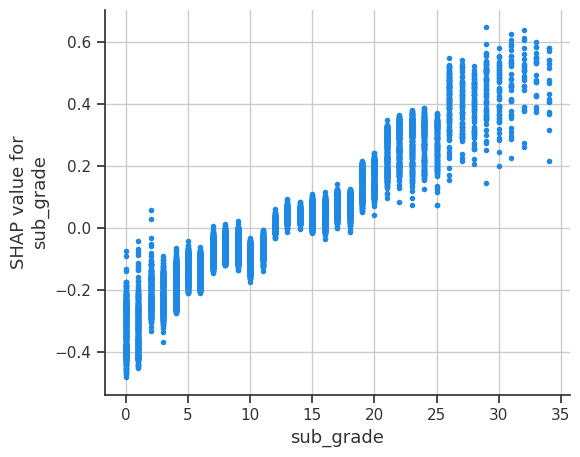

In [83]:
# Verificar que X_test está en formato DataFrame float
X_test_float = X_test.astype(float)

# Convertir valores SHAP al formato esperado (array)
shap_values_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Lista de variables clave para análisis
variables_clave = ["zip_code", "issue_d_scaled", "int_rate", "dti", "sub_grade"]

# Crear los dependence plots correctamente
for variable in variables_clave:
    shap.dependence_plot(variable, shap_values_array, X_test_float, interaction_index=None)

<Figure size 1000x800 with 0 Axes>

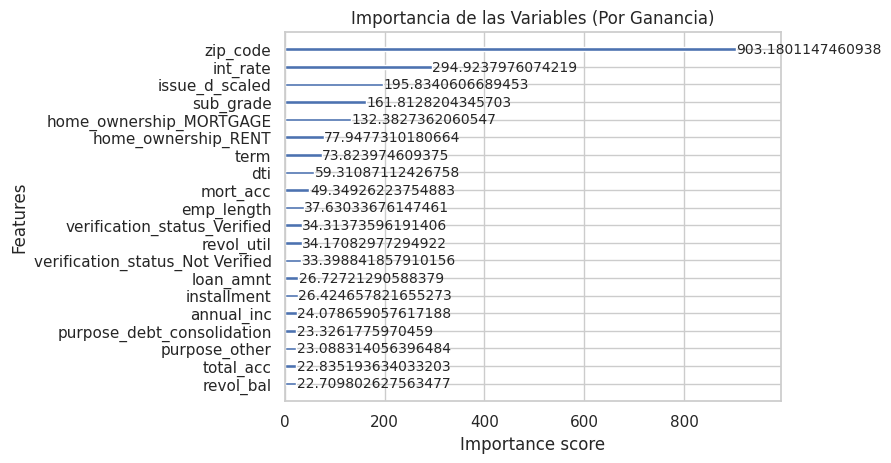

In [84]:
# Visualización de las variables más importantes del modelo (por Ganancia)
plt.figure(figsize=(10, 8))
plot_importance(best_xgb, importance_type='gain', max_num_features=20)
plt.title("Importancia de las Variables (Por Ganancia)")
plt.show()

In [86]:
# Definir la ruta donde se guardarán los modelos
model_dir = '/workspaces/AK-EA-GG_ProyectoFinalDS-ML/models'

# Guardar el modelo best_xgb
best_xgb_path = os.path.join(model_dir, 'best_xgb_test.pkl')
with open(best_xgb_path, 'wb') as model_file:
    pickle.dump(best_xgb, model_file)
print(f"Modelo best_xgb guardado en: {best_xgb_path}")

Modelo best_xgb guardado en: /workspaces/AK-EA-GG_ProyectoFinalDS-ML/models/best_xgb_test.pkl
